# Topic 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [58]:
dev = pd.read_csv('dev.txt', sep='\t', header=None, names=['label', 'text'])
test = pd.read_csv('test.txt', sep='\t', header=None, names=['label', 'text'])
huffpost = pd.read_json('Huffpost.json', lines=True)

list(dev.columns.values)
dev.dtypes

huffpost.shape

(200853, 6)

In [60]:
200853-(32739 +17827 +16058)

134229

In [59]:
labels = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT']
dt = None
for label in labels:
    huffpost = huffpost[huffpost.category != (label)]
huffpost['category'].value_counts()

huffpost.shape

(134229, 6)

In [54]:
labels = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT']
dt = None
for label in labels:
    huffpost = huffpost[huffpost['category'] != (label)]
huffpost['category'].value_counts()

huffpost.shape

(200853, 6)

In [55]:
huffpost['category'].value_counts()


TRAVEL            9887
STYLE & BEAUTY    9649
PARENTING         8677
HEALTHY LIVING    6694
QUEER VOICES      6314
FOOD & DRINK      6226
BUSINESS          5937
COMEDY            5175
SPORTS            4884
BLACK VOICES      4528
HOME & LIVING     4195
PARENTS           3955
THE WORLDPOST     3664
WEDDINGS          3651
WOMEN             3490
IMPACT            3459
DIVORCE           3426
CRIME             3405
MEDIA             2815
WEIRD NEWS        2670
GREEN             2622
WORLDPOST         2579
RELIGION          2556
STYLE             2254
SCIENCE           2178
WORLD NEWS        2177
TASTE             2096
TECH              2082
MONEY             1707
ARTS              1509
FIFTY             1401
GOOD NEWS         1398
ARTS & CULTURE    1339
ENVIRONMENT       1323
COLLEGE           1144
LATINO VOICES     1129
CULTURE & ARTS    1030
EDUCATION         1004
Name: category, dtype: int64

In [16]:
dataset_list = [dev, test]
dataset_list_names = ['dev', 'test']
for dataset in dataset_list:
    dataset['label'] = dataset['label'].replace(
        [0,1,2,3,4,5,6,7,8,9],
        ['Society & Culture',
        'Science & Mathematics',
        'Health',
        'Education & Reference',
        'Computers & Internet',
        'Sports',
        'Business & Finance',
        'Entertainment & Music',
        'Family & Relationships',
        'Politics & Government'])

In [17]:
dev_np = dev['text'].to_numpy()
test_np = test['text'].to_numpy()
huffpost_np = huffpost['headline'].to_numpy()

In [18]:
list_of_datasets = [dev_np, test_np, huffpost_np]
names_of_datasets = ('dev', 'test', 'Huffpost')
myit = iter(names_of_datasets)

rows_character = []
rows_words = []

for dataset in list_of_datasets:
    counter_words = 0
    counter_characters = 0
    avg_wordws = 0
    avg_characters = 0
    index = dataset.size
    for x in dataset:
        temp_words = len(x.split())
        counter_words = counter_words + temp_words

        temp_characters = len(x)
        counter_characters = counter_characters + temp_characters
    avg_words = counter_words / index
    avg_characters = counter_characters /index
    print(f'-{next(myit)}- \nWörter: {counter_words} \nBuchstaben: {counter_characters} \navg_words: {int(avg_words)}\navg_characters: {int(avg_characters)} \nTrainingsdatenpunkte: {index}\n')
    rows_character.append(temp_characters)
    rows_words.append(temp_words)

-dev- 
Wörter: 6428402 
Buchstaben: 31784113 
avg_words: 107
avg_characters: 529 
Trainingsdatenpunkte: 60000

-test- 
Wörter: 9831547 
Buchstaben: 49256318 
avg_words: 98
avg_characters: 492 
Trainingsdatenpunkte: 100000

-Huffpost- 
Wörter: 1915849 
Buchstaben: 11637484 
avg_words: 9
avg_characters: 57 
Trainingsdatenpunkte: 200853



Text(0.5, 0.98, 'Categorical Plotting')

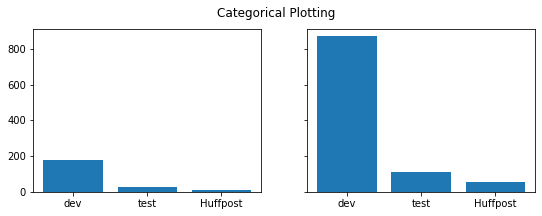

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(names_of_datasets, rows_words)
axs[1].bar(names_of_datasets, rows_character)
fig.suptitle('Categorical Plotting')


In [20]:
huffpost['category'].describe()

count       200853
unique          41
top       POLITICS
freq         32739
Name: category, dtype: object

In [21]:
dev['label'].describe()

count                     60000
unique                       10
top       Education & Reference
freq                       6000
Name: label, dtype: object

In [22]:
n = 0
for dataset in dataset_list:
    print('\n',dataset_list_names[n], '\n')
    print(dataset['label'].value_counts())
    n = n + 1


 dev 

Education & Reference     6000
Entertainment & Music     6000
Computers & Internet      6000
Health                    6000
Family & Relationships    6000
Sports                    6000
Politics & Government     6000
Business & Finance        6000
Society & Culture         6000
Science & Mathematics     6000
Name: label, dtype: int64

 test 

Education & Reference     10000
Entertainment & Music     10000
Health                    10000
Sports                    10000
Politics & Government     10000
Society & Culture         10000
Computers & Internet      10000
Family & Relationships    10000
Business & Finance        10000
Science & Mathematics     10000
Name: label, dtype: int64


In [10]:
huffpost['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [24]:
merged_dev_test = dev.append(test)
merged_dev_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   160000 non-null  object
 1   text    160000 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [25]:
temp_yin = dev.groupby('label')['text'].apply(lambda s: s.sample(1000))
temp_yin.to_csv('tars_topic_datasets/tars_sample_yin')
temp_huffpost = huffpost.groupby('category')['headline'].apply(lambda s: s.sample(1000))
temp_huffpost.to_csv('tars_topic_datasets/tars_sample_huffpost')

In [73]:
a = pd.read_csv('tars_topic_datasets/tars_sample_yin')
b = pd.read_csv('tars_topic_datasets/tars_sample_huffpost')

temp1 = a['text'].to_numpy()
temp2 = b['headline'].to_numpy(dtype=str)

list_of_datasets = [temp1, temp2]
names_of_datasets = ('yin', 'Huffpost')
myit = iter(names_of_datasets)

rows_character = []
rows_words = []

for dataset in list_of_datasets:
    counter_words = 0
    counter_characters = 0
    avg_wordws = 0
    avg_characters = 0
    index = dataset.size
    for x in dataset:
        temp_words = len(x.split())
        counter_words = counter_words + temp_words

        temp_characters = len(x)
        counter_characters = counter_characters + temp_characters
    avg_words = counter_words / index
    avg_characters = counter_characters /index
    print(f'-{next(myit)}- \nWörter: {counter_words} \nBuchstaben: {counter_characters} \navg_words: {int(avg_words)}\navg_characters: {int(avg_characters)} \nTrainingsdatenpunkte: {index}\n')

-yin- 
Wörter: 1071198 
Buchstaben: 5297315 
avg_words: 107
avg_characters: 529 
Trainingsdatenpunkte: 10000

-Huffpost- 
Wörter: 389605 
Buchstaben: 2364995 
avg_words: 9
avg_characters: 57 
Trainingsdatenpunkte: 41000



In [91]:
dt = pd.read_csv('tars_topic_datasets/tars_sample_huffpost')
dt['category'].value_counts()

BLACK VOICES      1000
CRIME             1000
GOOD NEWS         1000
EDUCATION         1000
POLITICS          1000
CULTURE & ARTS    1000
WELLNESS          1000
MONEY             1000
WEIRD NEWS        1000
PARENTS           1000
TRAVEL            1000
MEDIA             1000
COLLEGE           1000
WORLD NEWS        1000
THE WORLDPOST     1000
WORLDPOST         1000
RELIGION          1000
FIFTY             1000
IMPACT            1000
QUEER VOICES      1000
STYLE & BEAUTY    1000
ENVIRONMENT       1000
PARENTING         1000
SCIENCE           1000
COMEDY            1000
BUSINESS          1000
GREEN             1000
TASTE             1000
FOOD & DRINK      1000
TECH              1000
ARTS & CULTURE    1000
WEDDINGS          1000
WOMEN             1000
DIVORCE           1000
HEALTHY LIVING    1000
STYLE             1000
SPORTS            1000
ENTERTAINMENT     1000
HOME & LIVING     1000
ARTS              1000
LATINO VOICES     1000
Name: category, dtype: int64

In [92]:
labels = [
'BLACK VOICES',
'WEIRD NEWS',
'LATINO VOICES', 
'IMPACT',       
'FIFTY',         
'WORLDPOST',     
'THE WORLDPOST', 
'WORLD NEWS',    
'COLLEGE',       
'MEDIA',         
'ARTS & CULTURE',
'MONEY',         
'ENVIRONMENT',   
'TASTE',        
'CULTURE & ARTS',
'EDUCATION',     
'GOOD NEWS',     
'QUEER VOICES',  
'GREEN',         
'STYLE & BEAUTY',
'ARTS',
'HOME & LIVING',
'HEALTHY LIVING',
'FOOD & DRINK',
'PARENTING'
]

for label in labels:
    dt = dt[dt.category != (label)]
dt['category'].value_counts()

dt.shape   

(16000, 3)

In [93]:
dt['category'].value_counts()

ENTERTAINMENT    1000
POLITICS         1000
WELLNESS         1000
TECH             1000
SCIENCE          1000
PARENTS          1000
COMEDY           1000
TRAVEL           1000
WEDDINGS         1000
WOMEN            1000
BUSINESS         1000
DIVORCE          1000
CRIME            1000
RELIGION         1000
STYLE            1000
SPORTS           1000
Name: category, dtype: int64

In [94]:
dt.to_csv('tars_topic_datasets/tars_sample_huffpost.csv', index=False, columns=['category', 'headline'])